In [ ]:
! nvidia-smi

Mon Aug 17 16:14:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**LeNet-5(1998)**
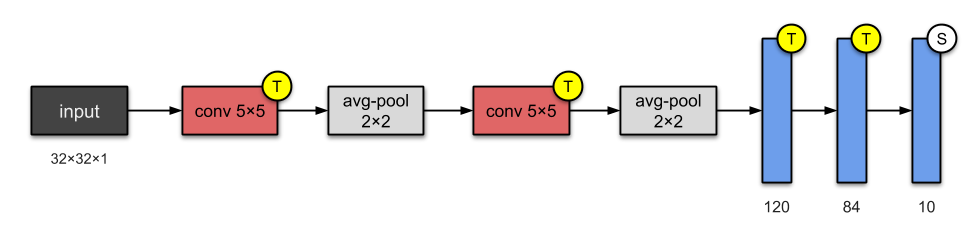

**Impact**

This architecture has become the standard ‘template’: stacking convolutions and pooling layers, and ending the network with one or more fully-connected layers.

[**Official Paper**](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_model(input_shape):
  model = Sequential([
      Conv2D(6, (5,5), activation='tanh', padding='same', input_shape=input_shape),
      MaxPool2D(),
      Conv2D(16, (5,5), activation='tanh',),
      MaxPool2D(),
      Flatten(),
      Dense(120, activation='tanh',),
      Dense(84, activation='tanh',),
      Dense(10, activation='softmax')
  ])

  return model

In [ ]:
def pre_process(data):# shape=(m,width,height,channel=1)
  data = data/255.
  return data[...,np.newaxis]

In [ ]:
(train_X, train_y), (test_X, test_y) = load_data()

In [ ]:
train_X = pre_process(train_X)
test_X = pre_process(test_X)

In [ ]:
model = get_model(train_X[1,:].shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
%cd drive/My Drive/Models/LeNet-5 # Connect your drive and upload downloaded model to this directory(or any directory of your choice after changing code hre)
!ls

/content/drive/My Drive/Models/LeNet-5
checkpoint


In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'checkpoint', monitor='val_accuracy', verbose=1, save_best_only=True,
    )

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, verbose=0, 
  )



In [ ]:
model.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), batch_size=8, callbacks=[model_checkpoint, early_stopping])

Epoch 1/30
7497/7500 [============================>.] - ETA: 0s - loss: 0.1350 - accuracy: 0.9590
Epoch 00001: val_accuracy improved from -inf to 0.98440, saving model to checkpoint
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint/assets
7500/7500 [==============================] - 64s 9ms/step - loss: 0.1350 - accuracy: 0.9590 - val_loss: 0.0531 - val_accuracy: 0.9844
Epoch 2/30
7496/7500 [============================>.] - ETA: 0s - loss: 0.0587 - accuracy: 0.9814
Epoch 00002: val_accuracy did not improve from 0.98440
7500/7500 [==============================] - 65s 9ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 3/30
7494/7500 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9863
Epoch 00003:

In [ ]:
def decode_output(predict):
  return np.argmax(predict)

In [ ]:
model = tf.keras.models.load_model('checkpoint')

6


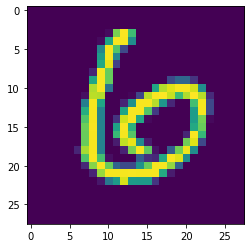

In [ ]:
i=11
img = test_X[i]

plt.imshow(img[:,:,0])

print(decode_output(model.predict(img[np.newaxis,...])))

In [ ]:
layers = model.layers
input = model.inputs

In [ ]:
from tensorflow.keras import Model

In [ ]:
layers_outputs = [layer.output for layer in layers]

feature_extractor = Model(inputs=input, outputs=layers_outputs)

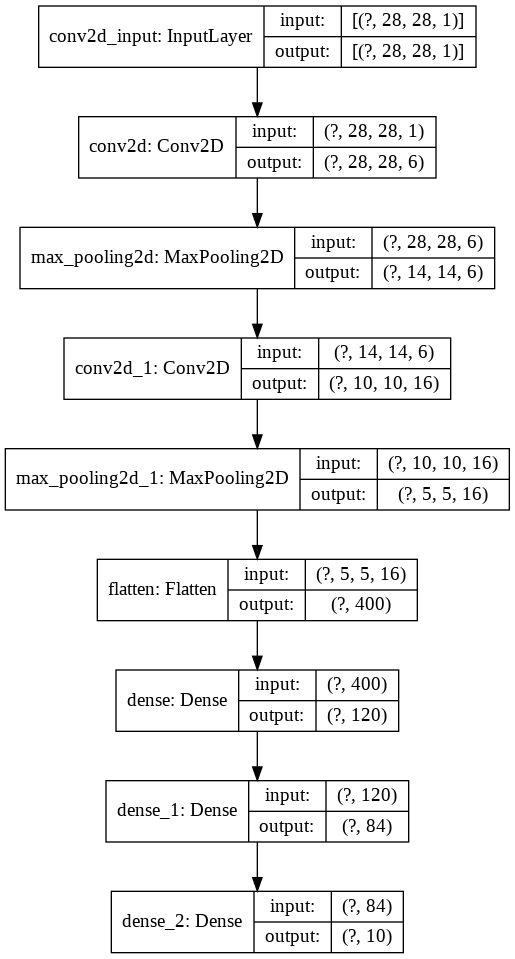

In [ ]:
tf.keras.utils.plot_model(feature_extractor, 'LeNet.png', show_shapes=True)

In [ ]:
features = feature_extractor(img[np.newaxis,...])


(1, 28, 28, 6)


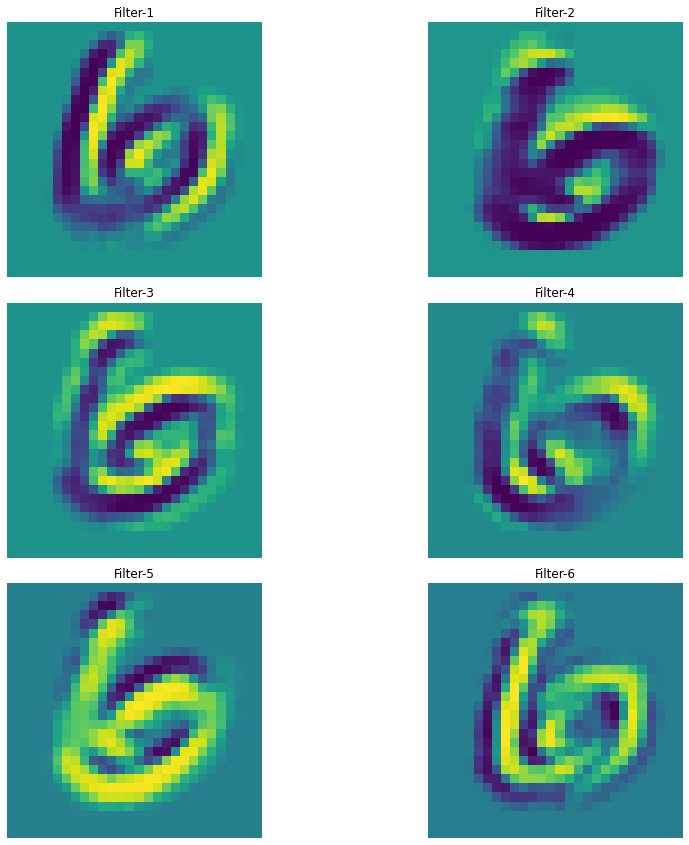

In [ ]:
#layer 1(conv2d layer)
# o/p=(None,28,28,6)

l1 = features[0]
print(f'\n{l1.shape}')
imgs = l1[0,:,:,:]
plt.figure(figsize=(15,15))

for n in range(6):
    ax = plt.subplot(3,2, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
    plt.title(f'Filter-{n+1}')
plt.subplots_adjust(wspace=0.01, hspace=0.1)



(1, 14, 14, 6)


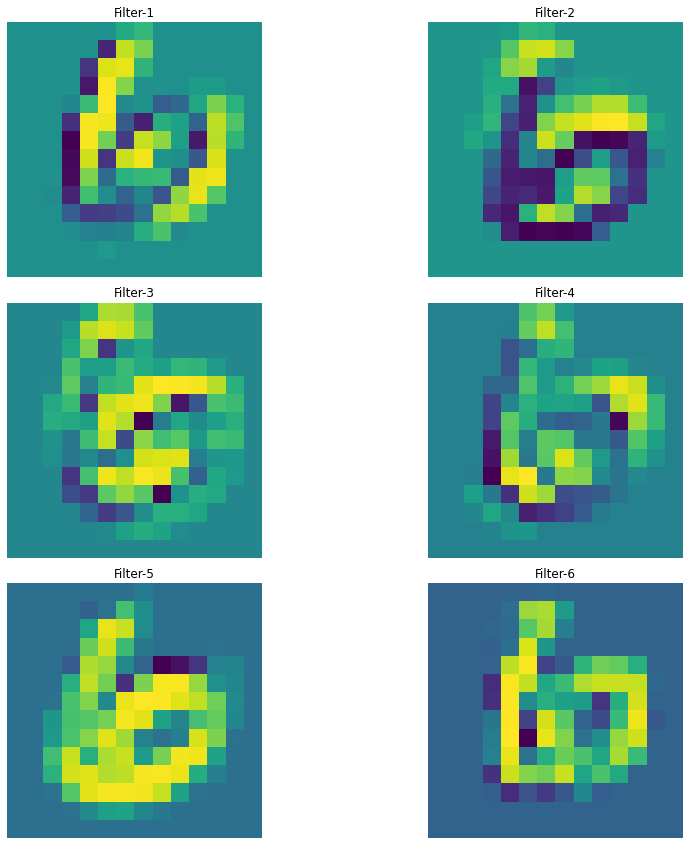

In [ ]:
#layer 2(max_pooling2d)
#o/p=(None,14,14,6)

l2 = features[1]
print(f'\n{l2.shape}')
imgs = l2[0,:,:,:]
plt.figure(figsize=(15,15))

for n in range(6):
    ax = plt.subplot(3,2, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
    plt.title(f'Filter-{n+1}')
plt.subplots_adjust(wspace=0.01, hspace=0.1)


(1, 10, 10, 16)


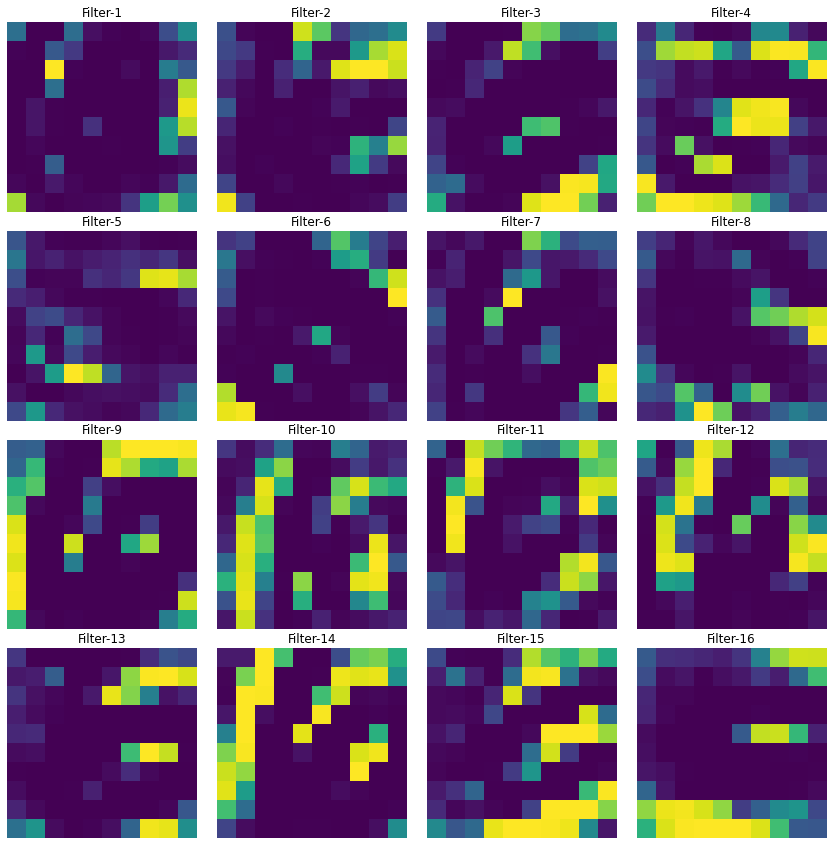

In [ ]:
#layer 3(conv2d_1)
#o/p=(None,10,10,16)

l3 = features[2]
print(f'\n{l3.shape}')
imgs = l3[0,:,:,:]
plt.figure(figsize=(15,15))

for n in range(16):
    ax = plt.subplot(4,4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
    plt.title(f'Filter-{n+1}')
plt.subplots_adjust(wspace=0.01, hspace=0.1)


(1, 5, 5, 16)


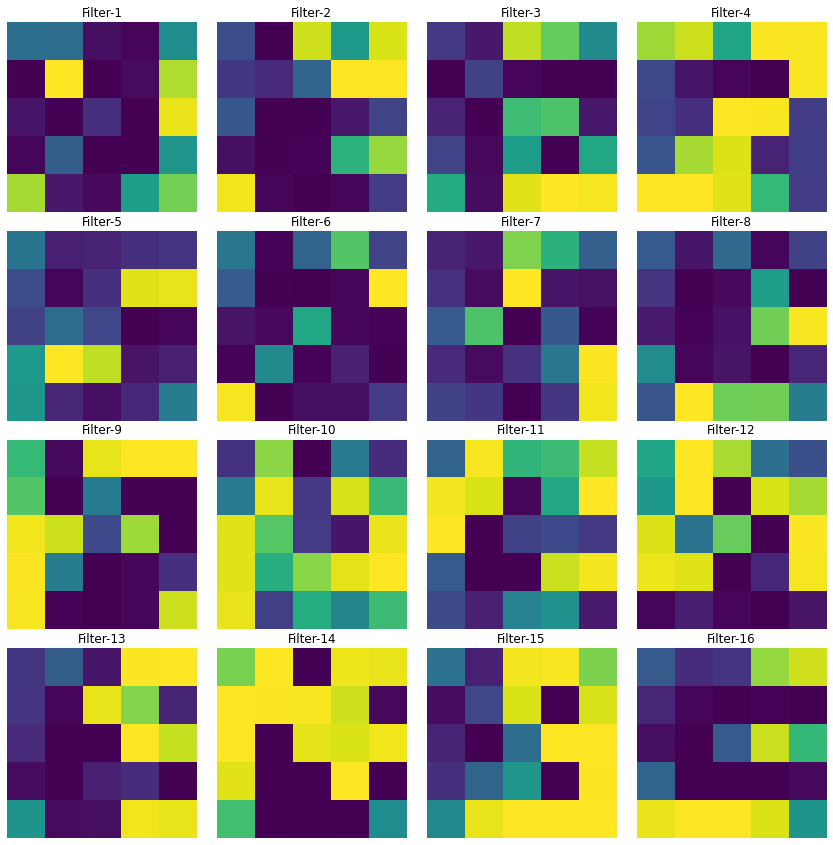

In [ ]:
#layer 4(max_pooling2d_1)
#o/p=(None,5,5,16)

l4 = features[3]
print(f'\n{l4.shape}')
imgs = l4[0,:,:,:]
plt.figure(figsize=(15,15))

for n in range(16):
    ax = plt.subplot(4,4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
    plt.title(f'Filter-{n+1}')
plt.subplots_adjust(wspace=0.01, hspace=0.1)